# Generate 1D/2D Data for QML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification, make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

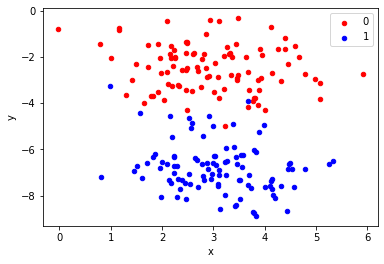

,x,y,label
0,3.258972,-6.515774,1
1,2.478944,-1.355035,0
2,2.216353,-2.379604,0
3,0.804004,-7.216147,1
4,3.214551,-1.947969,0


In [90]:
# run this block to generate a dataframe containing 2 features with 2 classes 0 and 1
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=30)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

df.head()

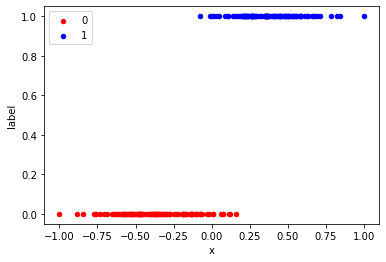

In [9]:
# run this block to generate a dataframe containing 1 feature with 2 classes 0 and 1
X, y = make_blobs(n_samples=200, centers=2, n_features=1, random_state=3)

# normalise
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)
#X_valid = std_scale.transform(X_valid)

# scale between -1 and +1
minmax_scale = MinMaxScaler((-1, 1)).fit(X)
X = minmax_scale.transform(X)
# X_valid = minmax_scale.transform(X_valid)

df = pd.DataFrame(dict(x=X[:,0], label=y))

colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y=1, label=key, color=colors[key])
plt.show()

df.head()

df.to_csv('1D Classification Data.csv')